### importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import copy
%matplotlib inline

## Magic Gamma Telescope

In [2]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)
df['class']=(df['class']=='g').astype(int) #converting classes to binary
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

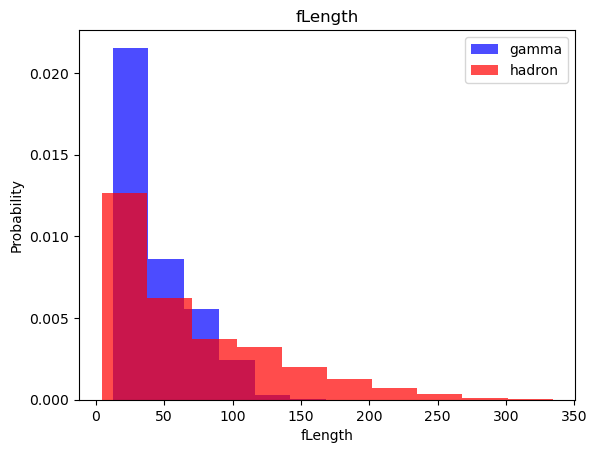

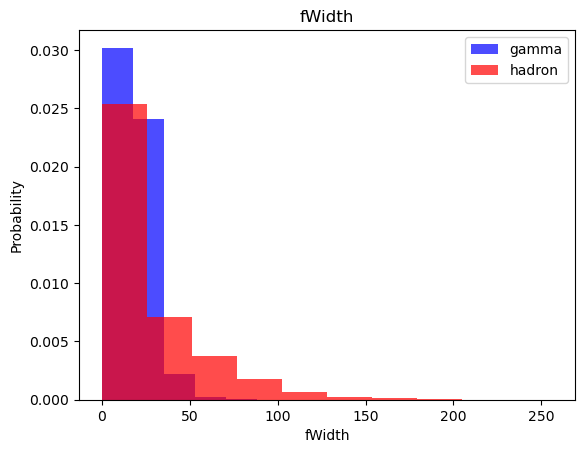

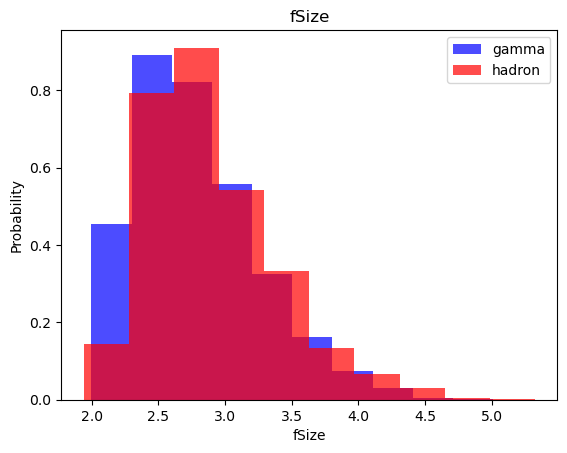

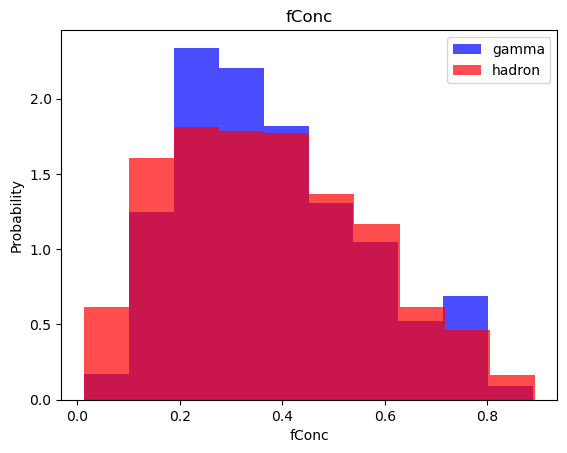

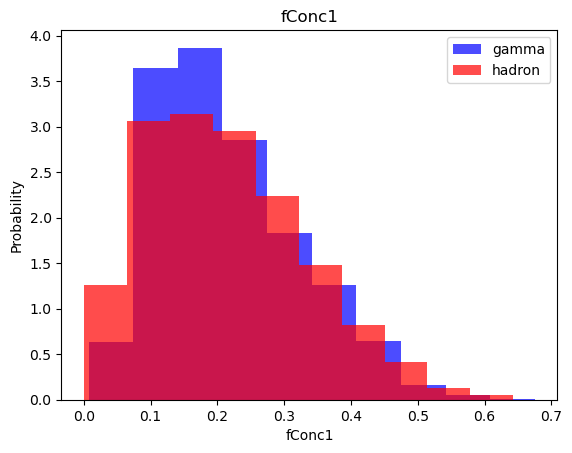

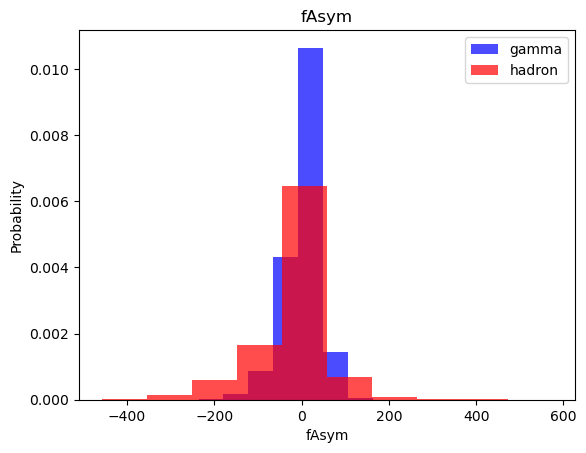

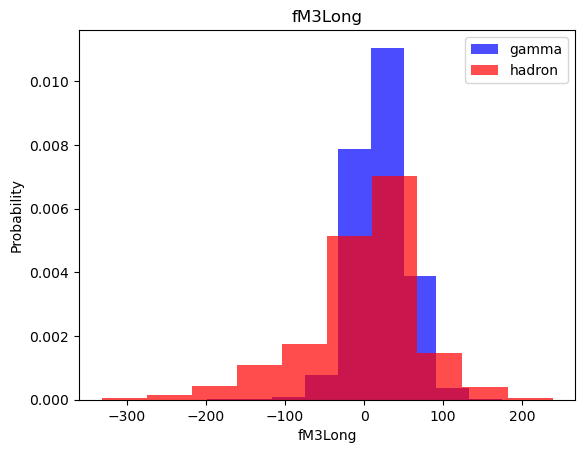

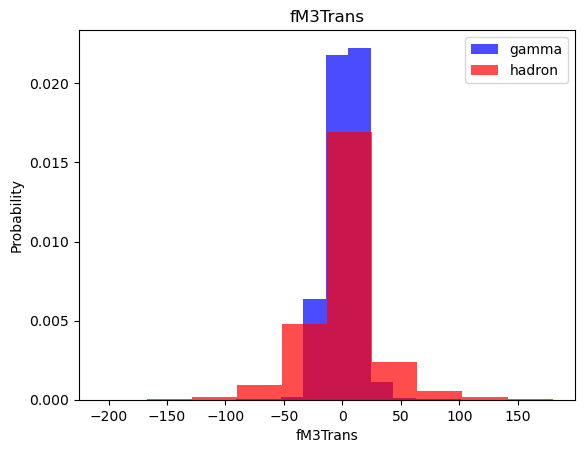

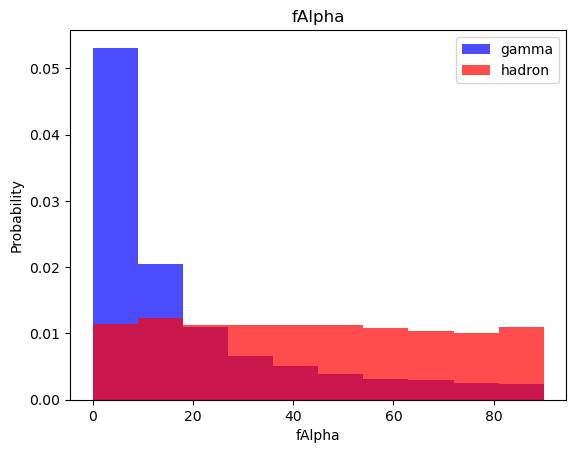

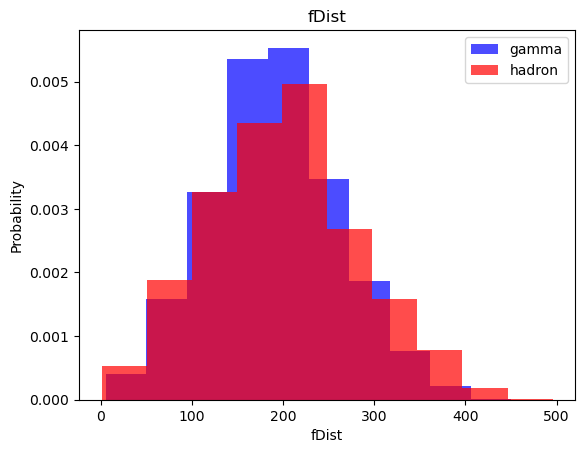

In [3]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='b',label='gamma',alpha=.7,density=True)
    plt.hist(df[df['class']==0][label],color='r',label='hadron',alpha=.7,density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

### Train,validation,test datasets

### scaling data

In [5]:
train,validation,test=np.split(df.sample(frac=1),[int(.6*len(df)),int(.8*len(df))])

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from imblearn.over_sampling import RandomOverSampler

In [10]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7408
4004


In [16]:
def scaler_ds(ds,oversample=False):
    x = ds[ds.columns[:-1]].values
    y = ds[ds.columns[-1]].values
           
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversample:
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y)
           
    data=np.hstack((x,np.reshape(y,(-1,1))))
    
    return data, x, y

In [23]:
train,x_train,y_train=scaler_ds(train,oversample=True)
validation,x_valid,y_valid=scaler_ds(validation,oversample=False)
test,x_test,y_test=scaler_ds(test,oversample=False)

In [41]:
scaler=StandardScaler()
scaler.fit_transform(df[df.columns[:-1].values])

array([[-0.57722602, -0.33680419, -0.38113037, ..., -0.40584194,
         0.47681587, -1.49786555],
       [-0.51096889, -0.57002666, -0.64859479, ..., -0.49009359,
        -0.81541816,  0.15312459],
       [ 2.56827756,  6.20585836,  2.61578306, ..., -2.18302986,
         1.88922413,  0.84263513],
       ...,
       [ 0.52392318,  1.38177927,  1.31887687, ..., -0.4665087 ,
         0.10163583,  0.83900338],
       [ 1.58775746,  2.98278123,  2.47337518, ..., -3.07720555,
         2.18525981,  2.87032093],
       [ 3.16145936,  1.67999288,  0.81314905, ...,  1.49930076,
         0.96101431,  1.05044239]])

In [42]:
np.shape(df[df.columns[:-1]].values)

(19020, 10)

### kNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# Training
kN=KNeighborsClassifier(n_neighbors=5)
kN.fit(x_train,y_train)

# Testing
y_pred=kN.predict(x_test)

# Validation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1358
           1       0.85      0.86      0.86      2446

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



### Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
# Training
nb=GaussianNB()
nb=nb.fit(x_train,y_train)

# Testing
y_pred=nb.predict(x_test)

# Validation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1358
           1       0.73      0.89      0.80      2446

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
# Training
lg=LogisticRegression()
lg=lg.fit(x_train,y_train)

# Testing
y_pred = lg.predict(x_test)

# Validation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1358
           1       0.84      0.81      0.83      2446

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



### SVM

In [50]:
from sklearn.svm import SVC

In [51]:
import numpy as np
s=np.zeros((7,2))
s=s.reshape((-1,1))

In [52]:
# Training
svm = SVC()
svm = svm.fit(x_train,y_train)

# Testing
y_pred = svm.predict(x_test)

#Validation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1358
           1       0.88      0.88      0.88      2446

    accuracy                           0.85      3804
   macro avg       0.83      0.83      0.83      3804
weighted avg       0.85      0.85      0.85      3804



## Neural Nets

In [31]:
import tensorflow as tf

In [39]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

    return nn_model, history

In [ ]:
df

In [38]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

16 nodes, dropout 0, lr 0.01, batch size 32


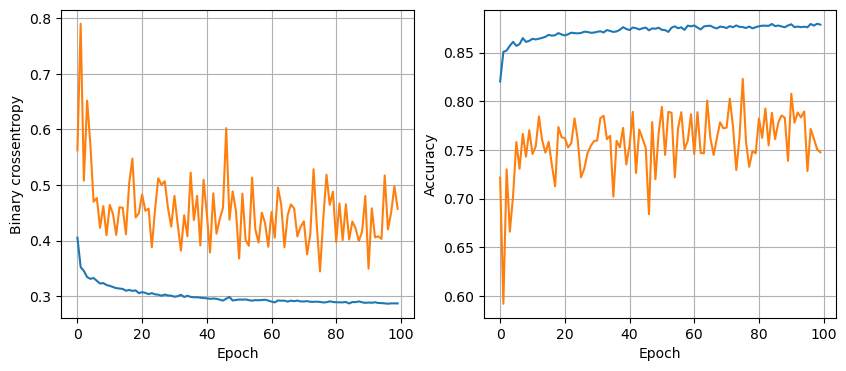

119/119 [==============================] - 1s 5ms/step - loss: 0.3062 - accuracy: 0.8762
16 nodes, dropout 0, lr 0.01, batch size 64


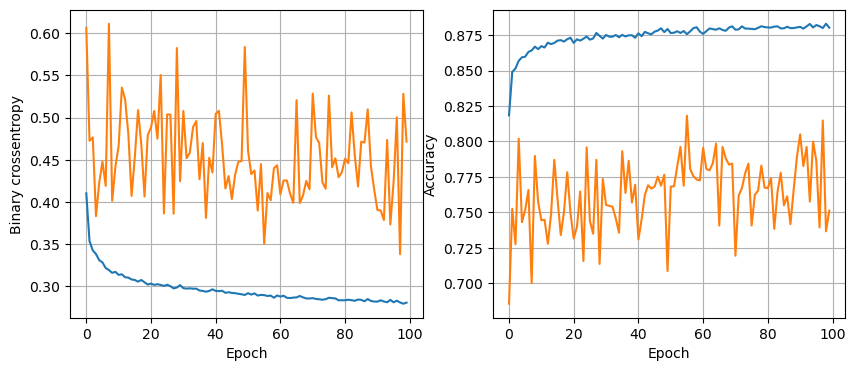

119/119 [==============================] - 1s 4ms/step - loss: 0.3030 - accuracy: 0.8788
16 nodes, dropout 0, lr 0.01, batch size 128


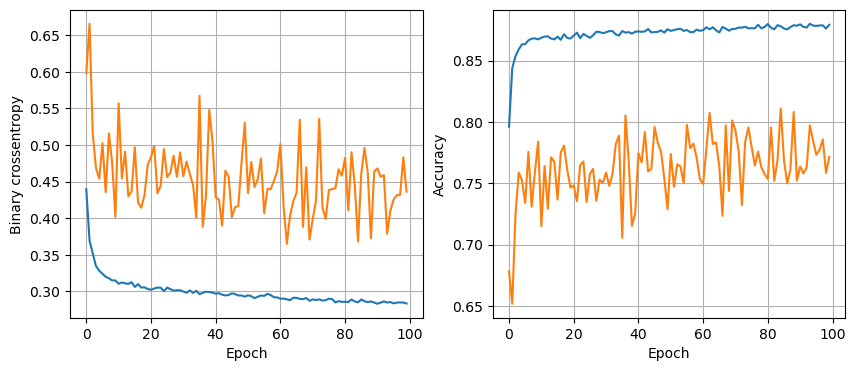

119/119 [==============================] - 1s 4ms/step - loss: 0.3043 - accuracy: 0.8841
16 nodes, dropout 0, lr 0.005, batch size 32


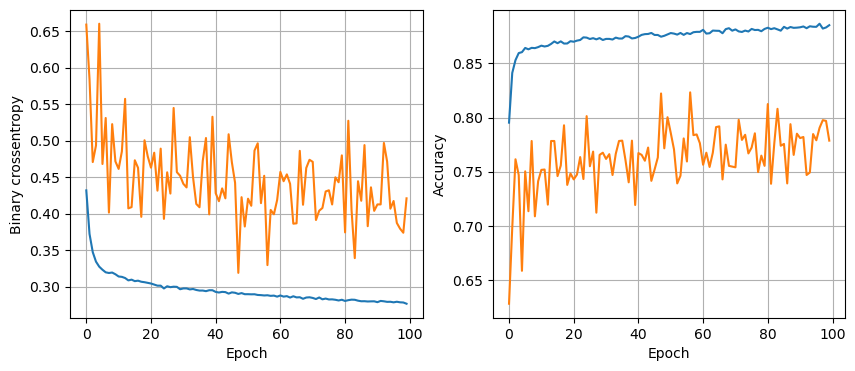

119/119 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8828
16 nodes, dropout 0, lr 0.005, batch size 64


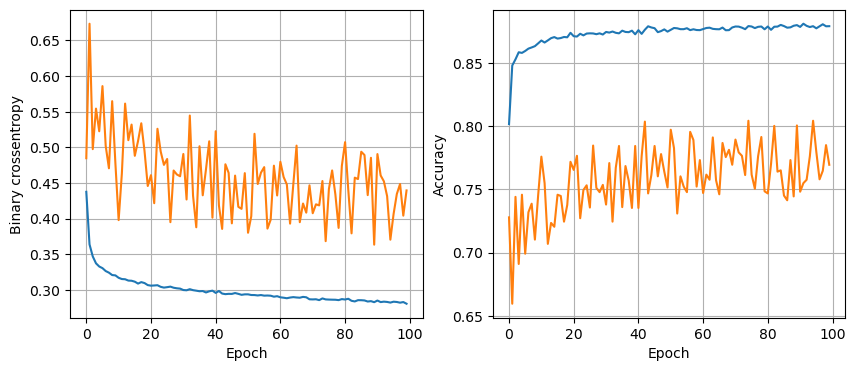

119/119 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.8817
16 nodes, dropout 0, lr 0.005, batch size 128


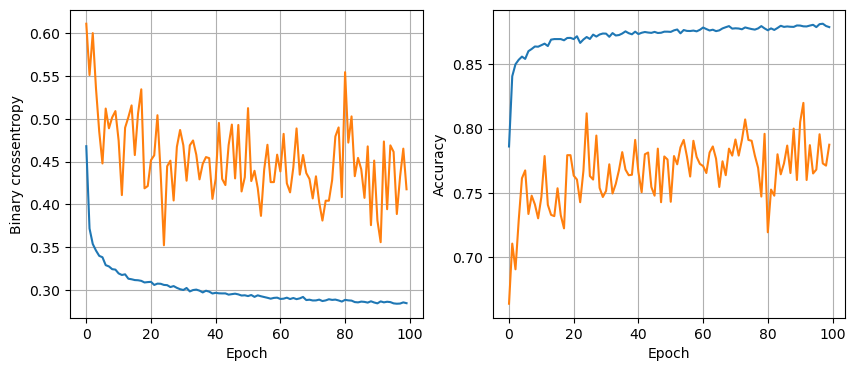

119/119 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8736
16 nodes, dropout 0, lr 0.001, batch size 32


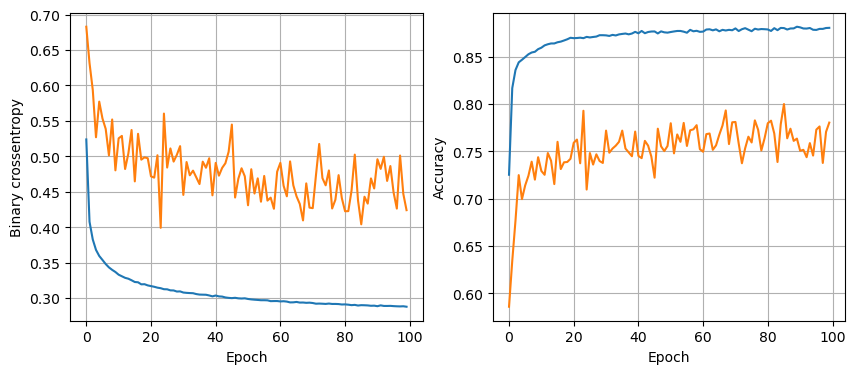

119/119 [==============================] - 0s 4ms/step - loss: 0.3070 - accuracy: 0.8788
16 nodes, dropout 0, lr 0.001, batch size 64


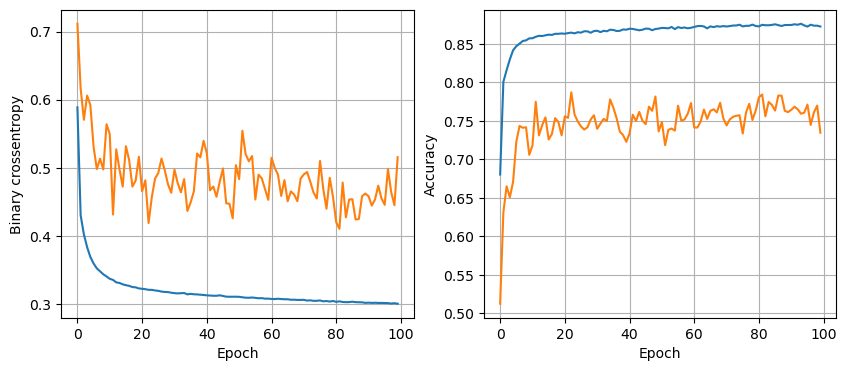

119/119 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8801
16 nodes, dropout 0, lr 0.001, batch size 128


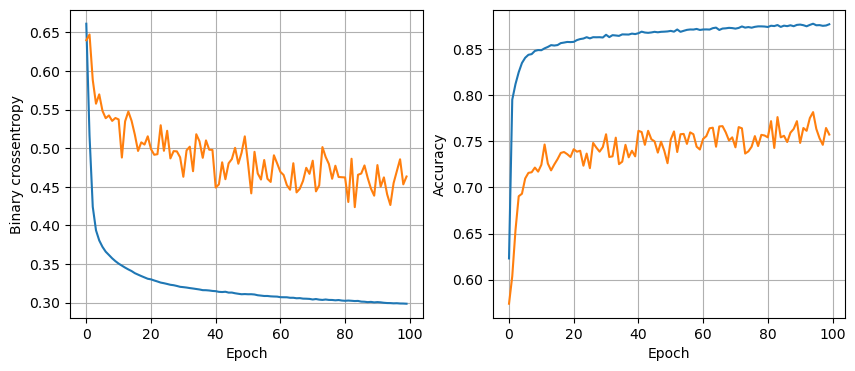

119/119 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8801
16 nodes, dropout 0.2, lr 0.01, batch size 32


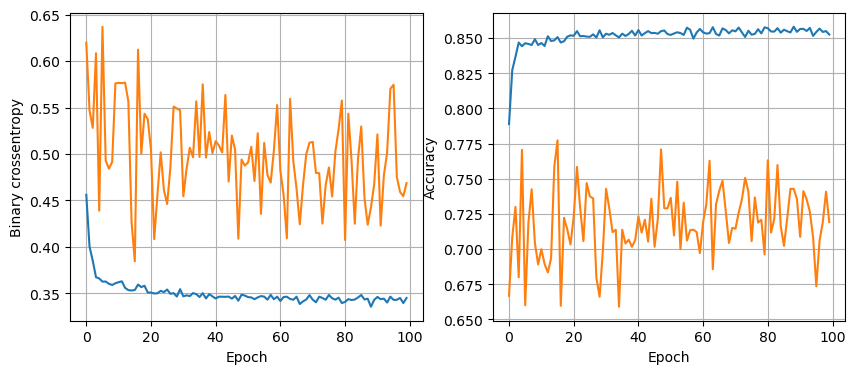

119/119 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8741
16 nodes, dropout 0.2, lr 0.01, batch size 64


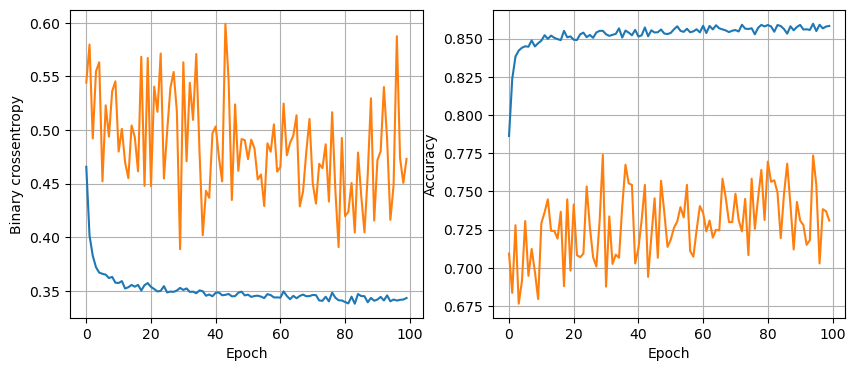

119/119 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8757
16 nodes, dropout 0.2, lr 0.01, batch size 128


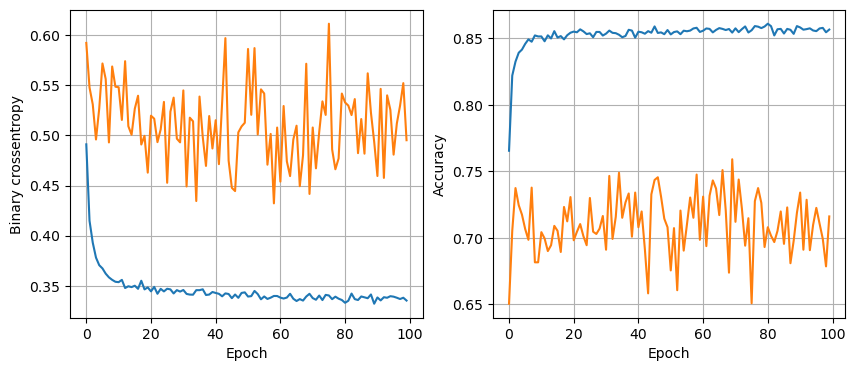

119/119 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8804
16 nodes, dropout 0.2, lr 0.005, batch size 32


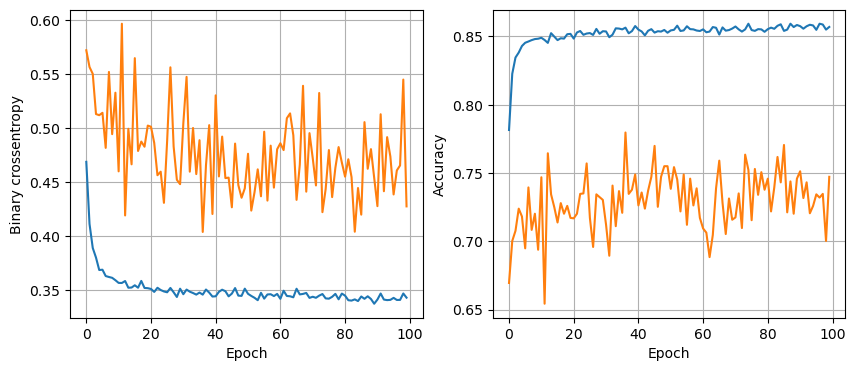

119/119 [==============================] - 1s 2ms/step - loss: 0.3135 - accuracy: 0.8817
16 nodes, dropout 0.2, lr 0.005, batch size 64


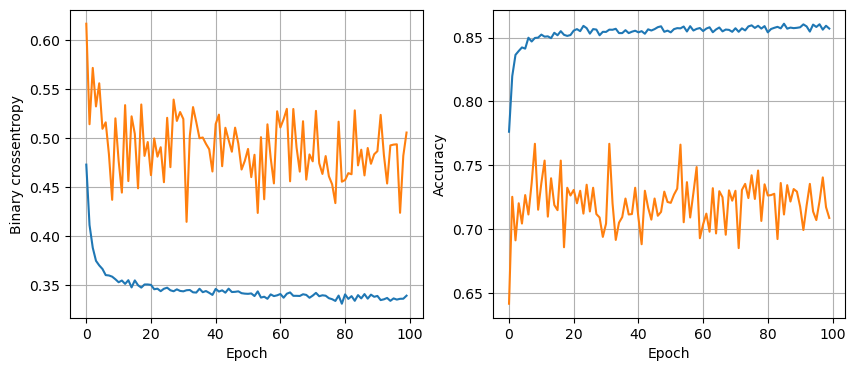

119/119 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8796
16 nodes, dropout 0.2, lr 0.005, batch size 128


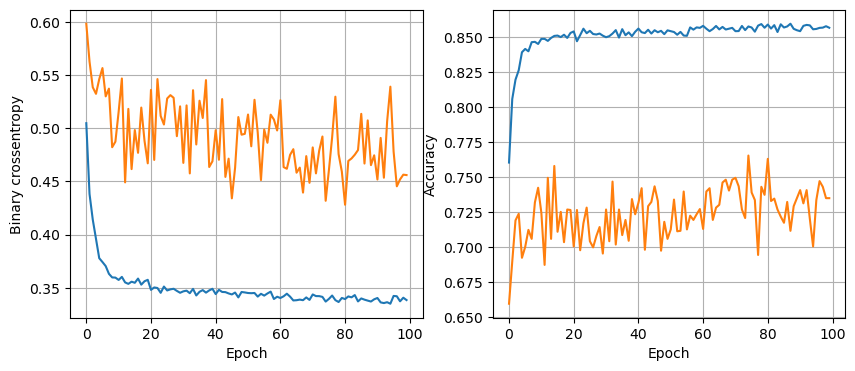

119/119 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.8801
16 nodes, dropout 0.2, lr 0.001, batch size 32


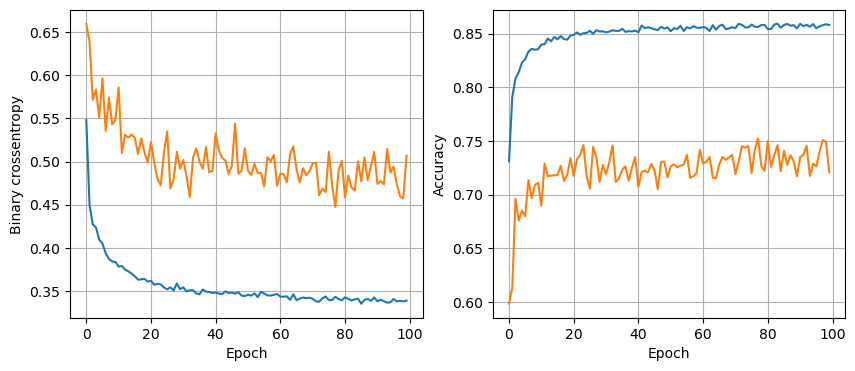

119/119 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8764
16 nodes, dropout 0.2, lr 0.001, batch size 64


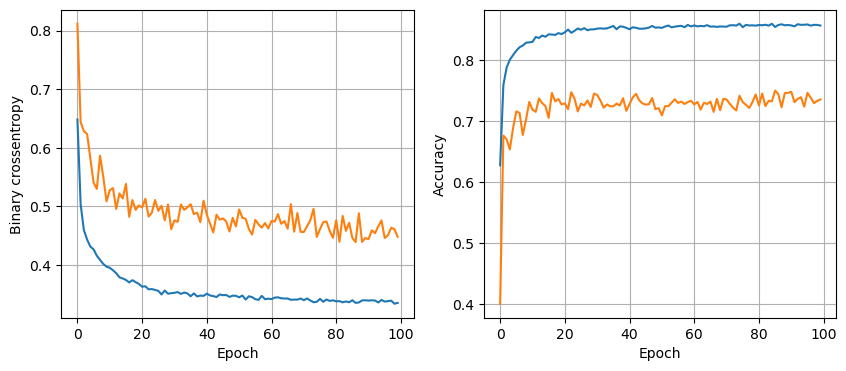

119/119 [==============================] - 0s 1ms/step - loss: 0.3090 - accuracy: 0.8783
16 nodes, dropout 0.2, lr 0.001, batch size 128


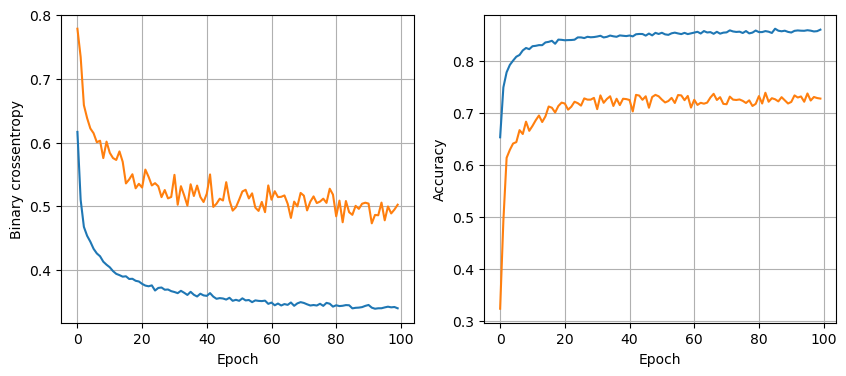

119/119 [==============================] - 0s 1ms/step - loss: 0.3107 - accuracy: 0.8764
32 nodes, dropout 0, lr 0.01, batch size 32


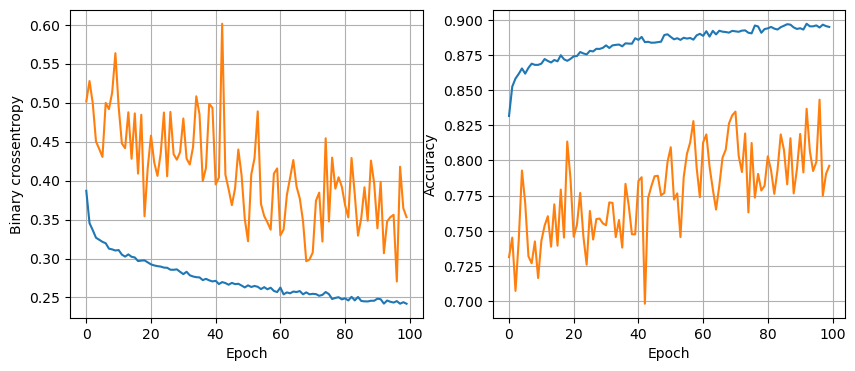

119/119 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8738
32 nodes, dropout 0, lr 0.01, batch size 64


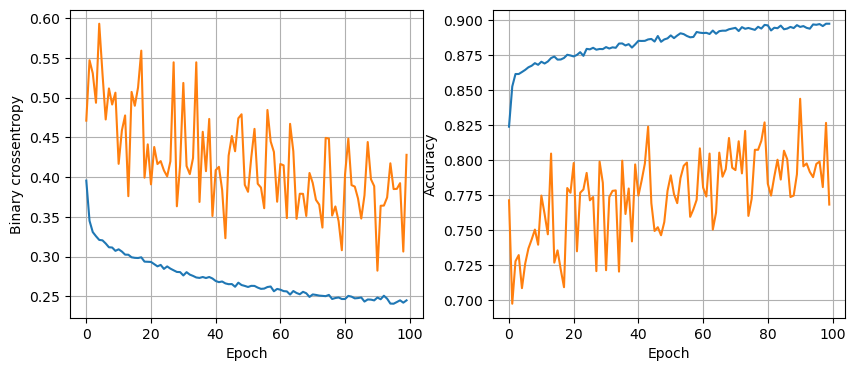

119/119 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8825
32 nodes, dropout 0, lr 0.01, batch size 128


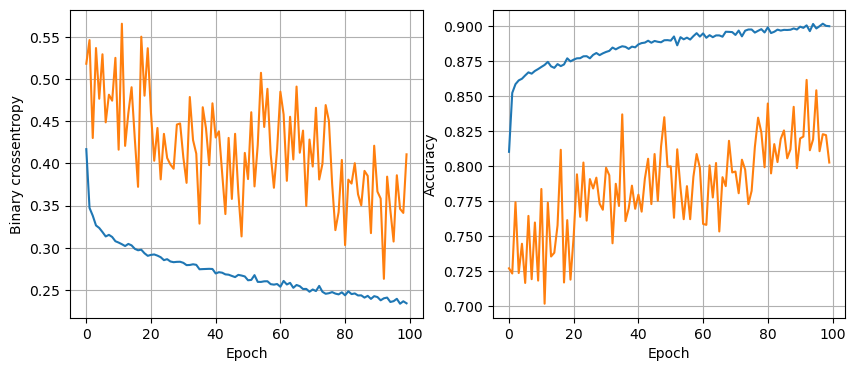

119/119 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.8838
32 nodes, dropout 0, lr 0.005, batch size 32


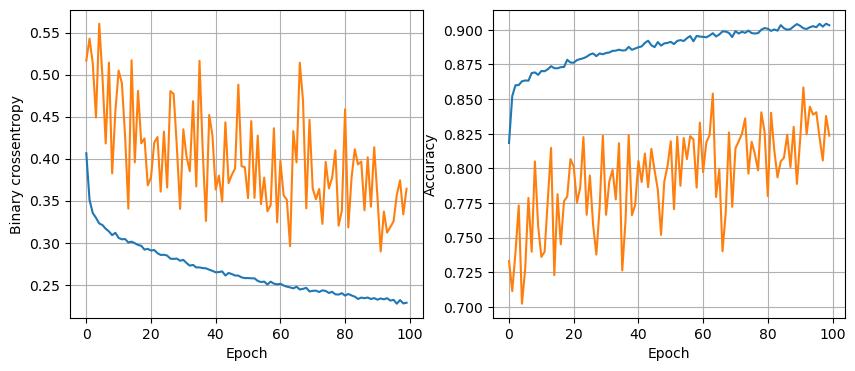

119/119 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8793
32 nodes, dropout 0, lr 0.005, batch size 64


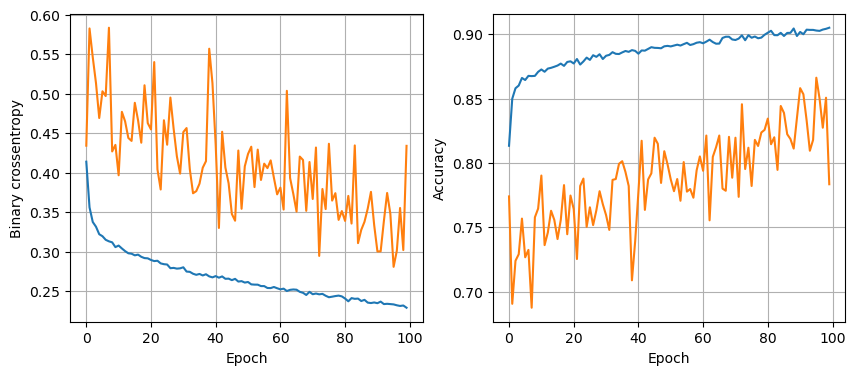

119/119 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8778
32 nodes, dropout 0, lr 0.005, batch size 128


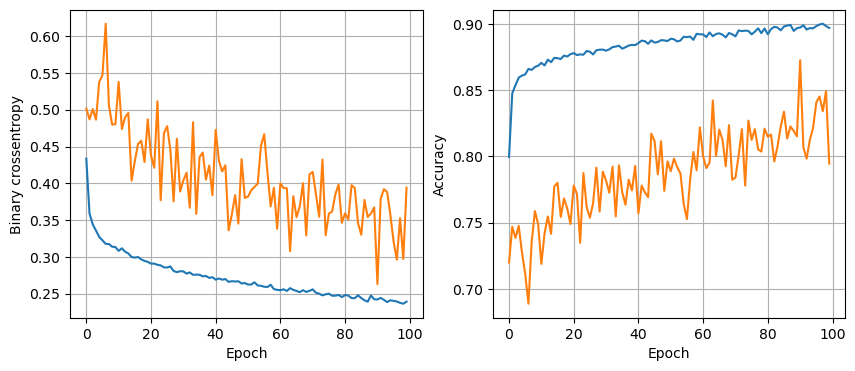

119/119 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8754
32 nodes, dropout 0, lr 0.001, batch size 32


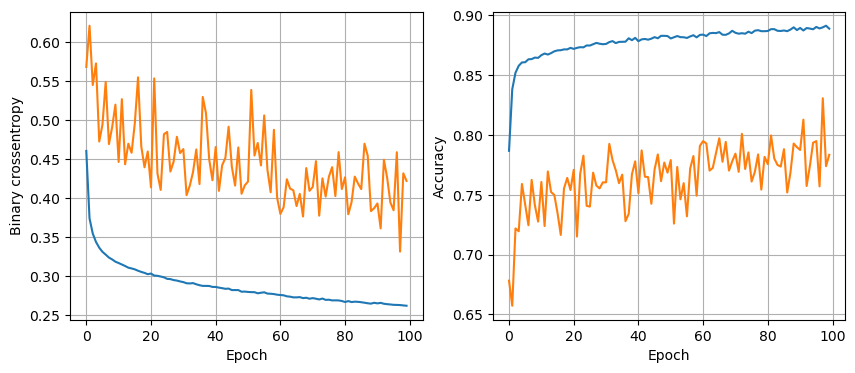

119/119 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8828
32 nodes, dropout 0, lr 0.001, batch size 64


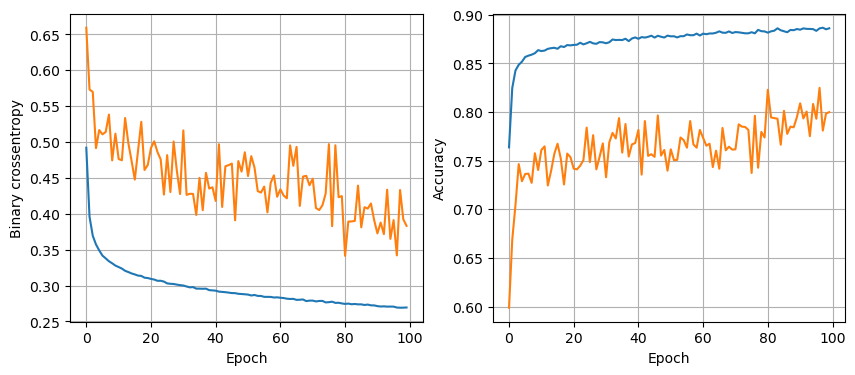

119/119 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8859
32 nodes, dropout 0, lr 0.001, batch size 128


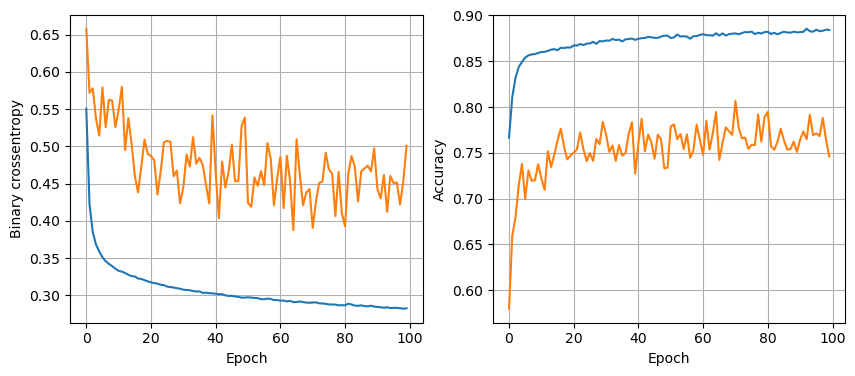

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8817
32 nodes, dropout 0.2, lr 0.01, batch size 32


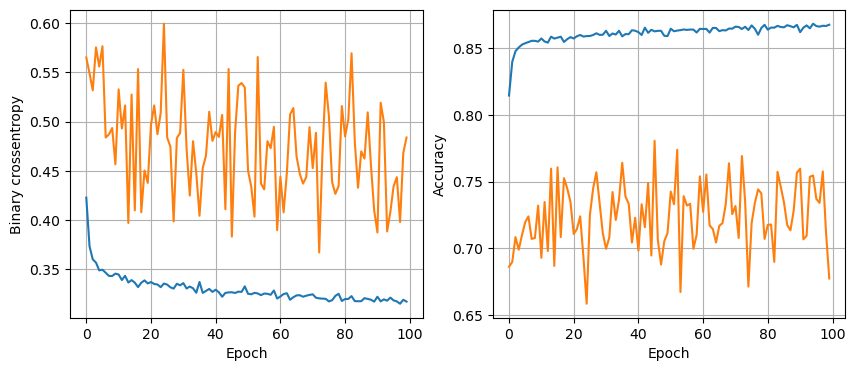

119/119 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.01, batch size 64


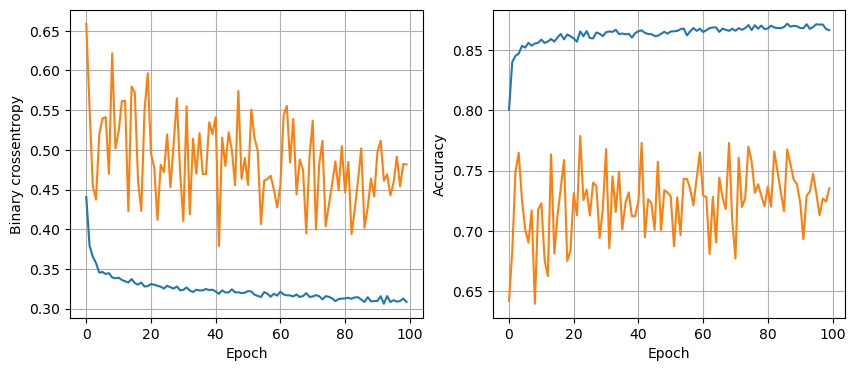

119/119 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8854
32 nodes, dropout 0.2, lr 0.01, batch size 128


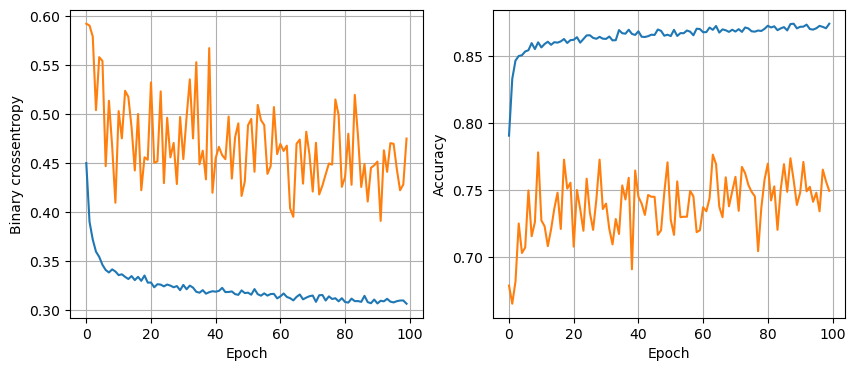

119/119 [==============================] - 1s 5ms/step - loss: 0.2888 - accuracy: 0.8862
32 nodes, dropout 0.2, lr 0.005, batch size 32


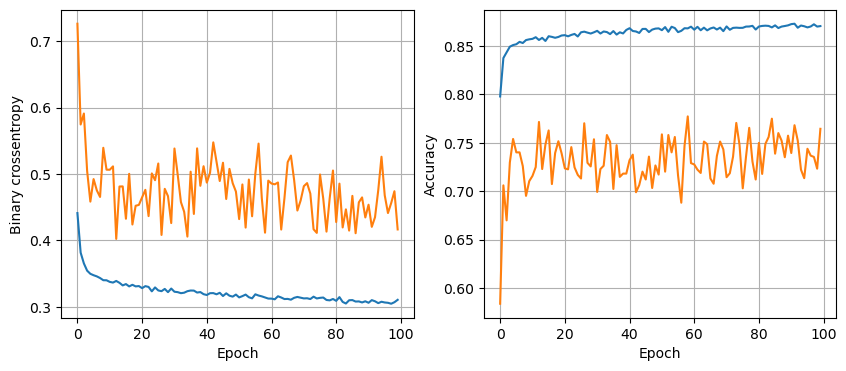

119/119 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.8896
32 nodes, dropout 0.2, lr 0.005, batch size 64


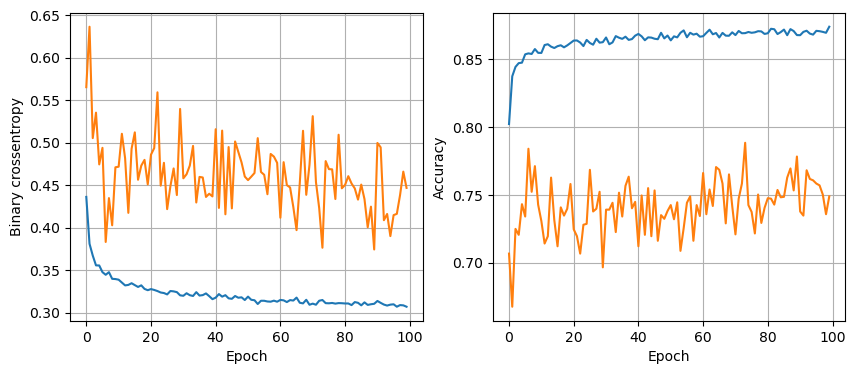

119/119 [==============================] - 1s 6ms/step - loss: 0.2922 - accuracy: 0.8856
32 nodes, dropout 0.2, lr 0.005, batch size 128


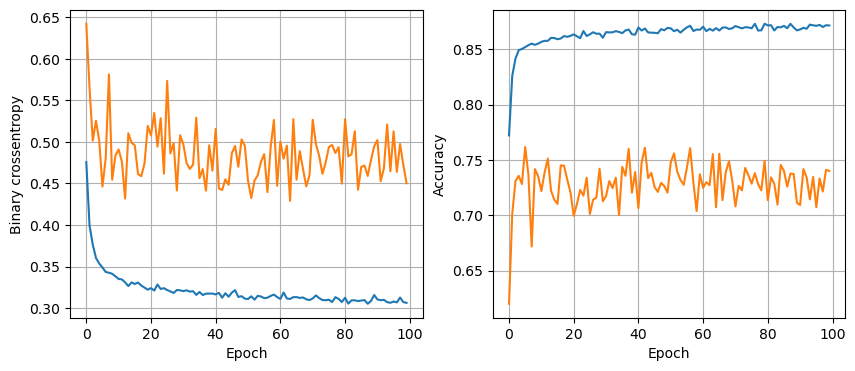

119/119 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.8828
32 nodes, dropout 0.2, lr 0.001, batch size 32


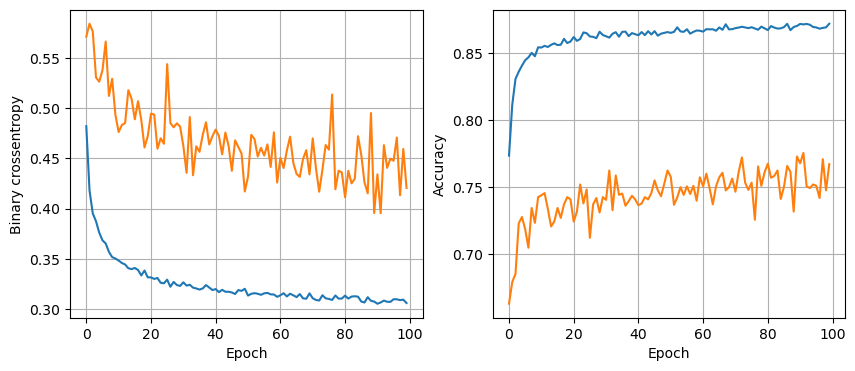

119/119 [==============================] - 1s 3ms/step - loss: 0.2915 - accuracy: 0.8864
32 nodes, dropout 0.2, lr 0.001, batch size 64


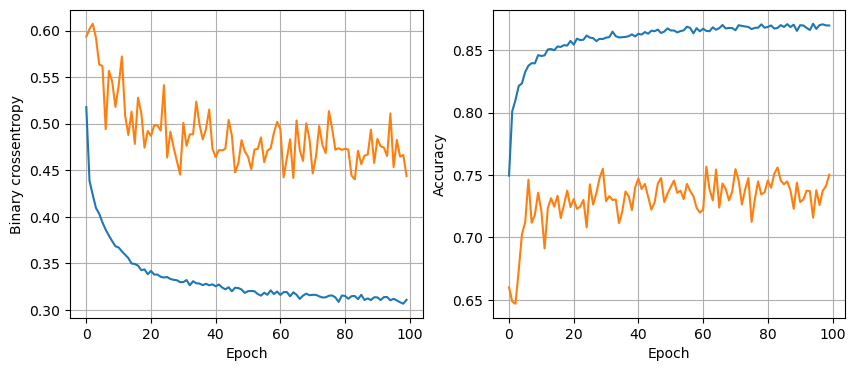

119/119 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.8833
32 nodes, dropout 0.2, lr 0.001, batch size 128


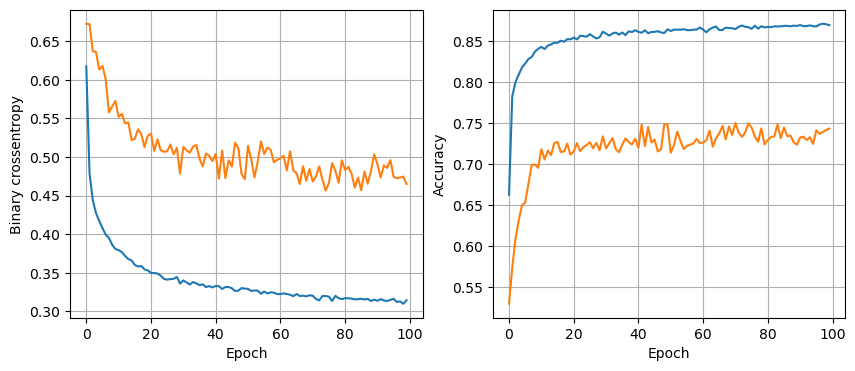

119/119 [==============================] - 1s 2ms/step - loss: 0.2903 - accuracy: 0.8817
64 nodes, dropout 0, lr 0.01, batch size 32


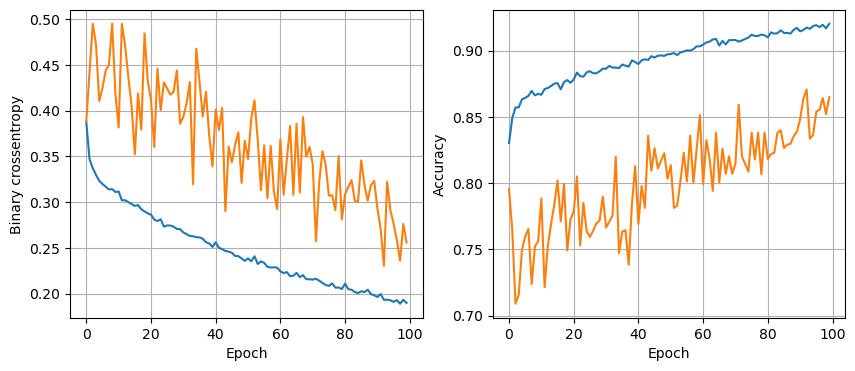

119/119 [==============================] - 1s 4ms/step - loss: 0.4845 - accuracy: 0.8707
64 nodes, dropout 0, lr 0.01, batch size 64


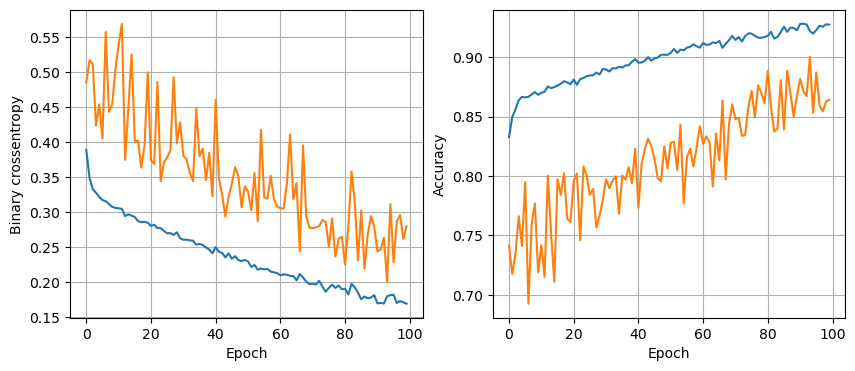

119/119 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.8583
64 nodes, dropout 0, lr 0.01, batch size 128


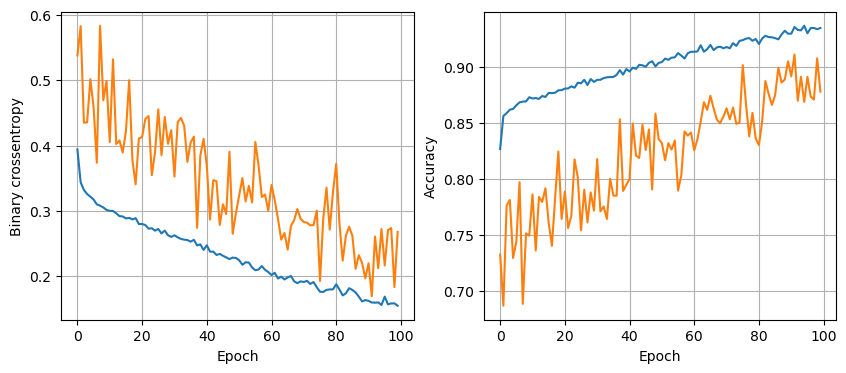

119/119 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.8604
64 nodes, dropout 0, lr 0.005, batch size 32


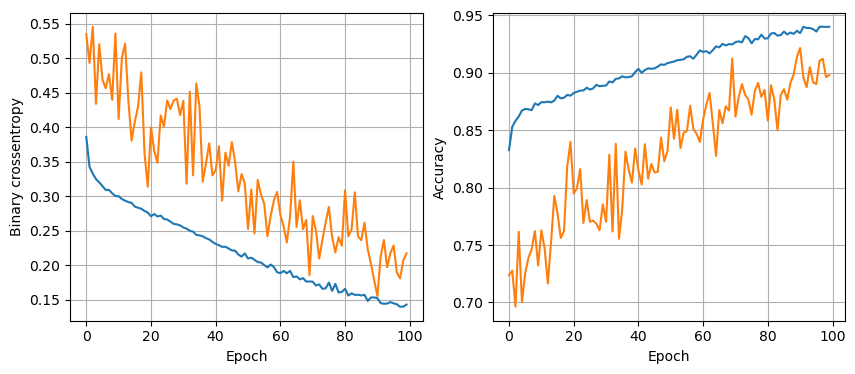

119/119 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.8601
64 nodes, dropout 0, lr 0.005, batch size 64


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)[0]
                if val_loss < least_val_loss:
                        least_val_loss = val_loss
                        least_loss_model = model

In [33]:
val_loss

NameError: name 'val_loss' is not defined

In [29]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred>.5).astype('int').reshape(-1,)
print(classification_report(y_test,y_pred))

AttributeError: 'NoneType' object has no attribute 'predict'

## Bikes

In [7]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### Importing and cleaning data

In [58]:
df = pd.read_csv('SeoulBikeData.csv').drop(columns=['Date','Holiday','Seasons'])

In [54]:
data_cols = ['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']

In [55]:
df.columns=data_cols

In [56]:
df['functional'] = (df['functional']=='Yes').astype('int')

In [57]:
df = df.loc[df['hour']==12]

In [75]:
df=df.drop('hour',axis=1)

In [76]:
df

bike_count  temp  humidity  wind  visibility  dew_pt_temp  radiation  \
12           449   1.7        23   1.4        2000        -17.2       1.11   
36           479   4.3        41   1.3        1666         -7.8       1.09   
60           333   5.8        85   1.7         349          3.4       0.43   
84           393  -0.3        38   4.8        1823        -12.9       1.11   
108          321  -2.3        25   0.0        1962        -19.7       0.00   
...          ...   ...       ...   ...         ...          ...        ...   
8652         752   9.1        57   1.1         562          1.0       1.69   
8676         672   9.3        61   1.5         390          2.1       0.85   
8700         635   7.9        14   1.7        1688        -18.0       1.81   
8724         661   5.6        27   0.3        1522        -11.9       0.34   
8748         720   6.6        35   1.3        1409         -7.8       1.70   

      rain  snow  functional  
12     0.0   0.0           1  
36     0.0   0.0           1  
60     0.0   0.0           1  
84     0.0   0.0           1  
108    0.0   0.0           1  
...    ...   ...         ...  
8652   0.0   0.0           1  
8676   0.0   0.0           1  
8700   0.0   0.0           1  
8724   0.0   0.0           1  
8748   0.0   0.0           1  

[365 rows x 10 columns]

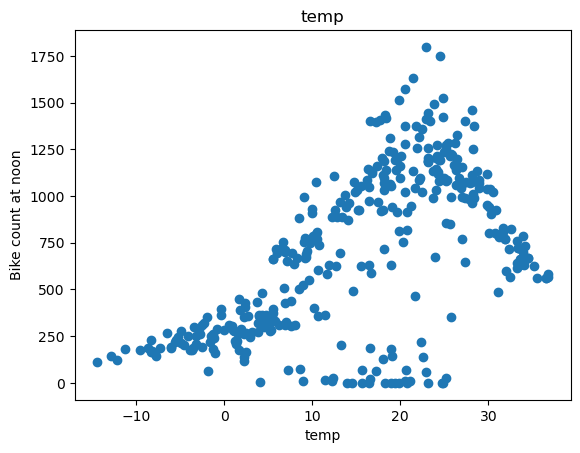

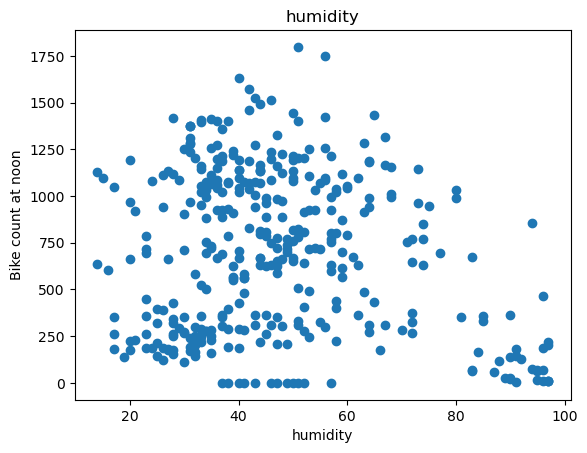

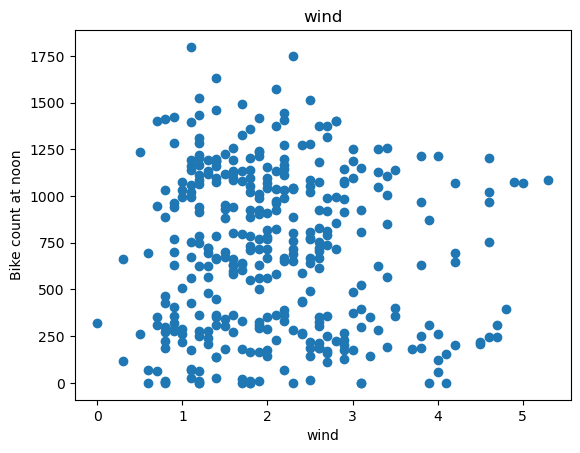

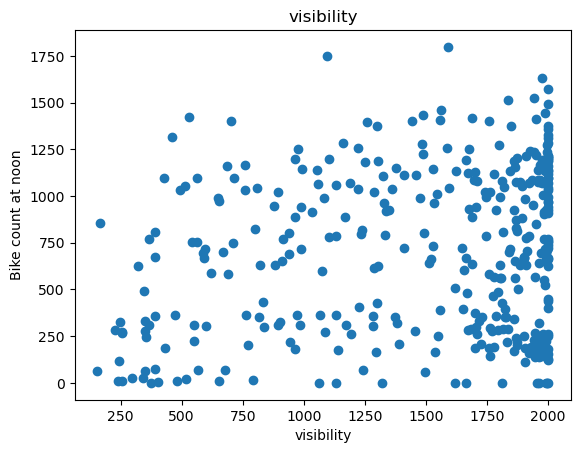

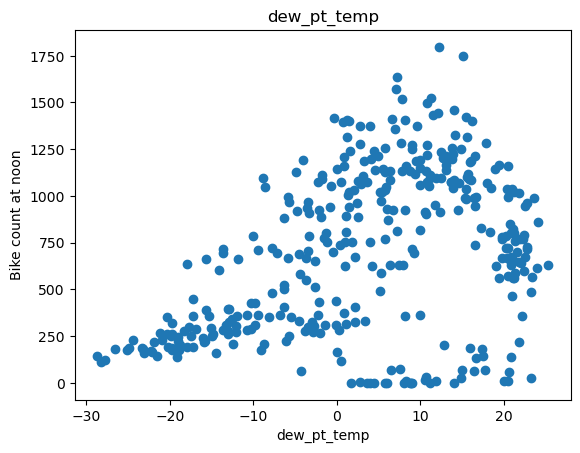

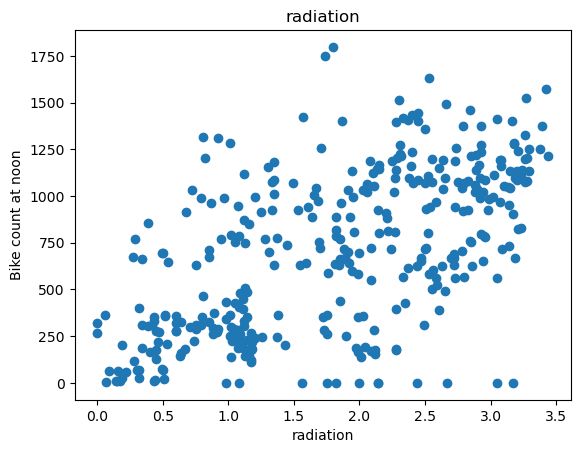

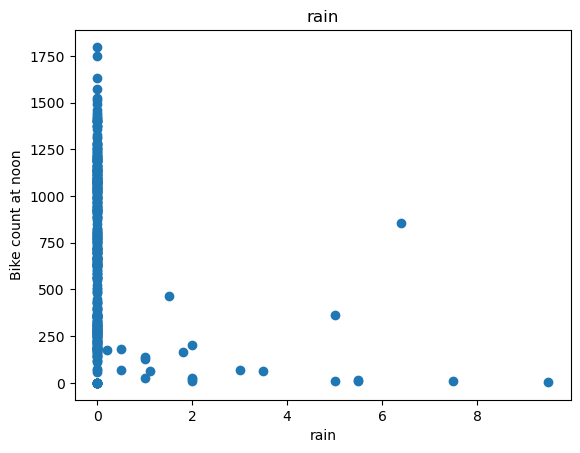

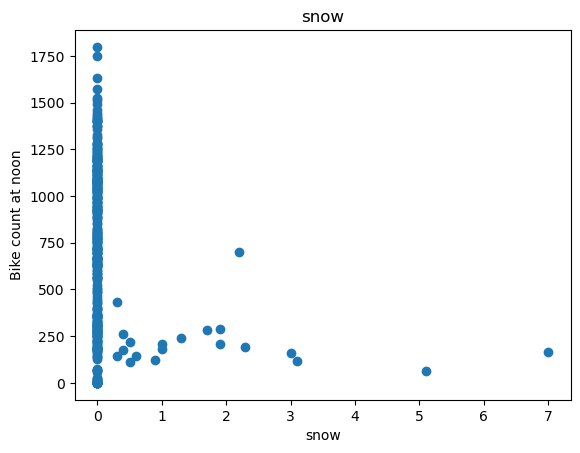

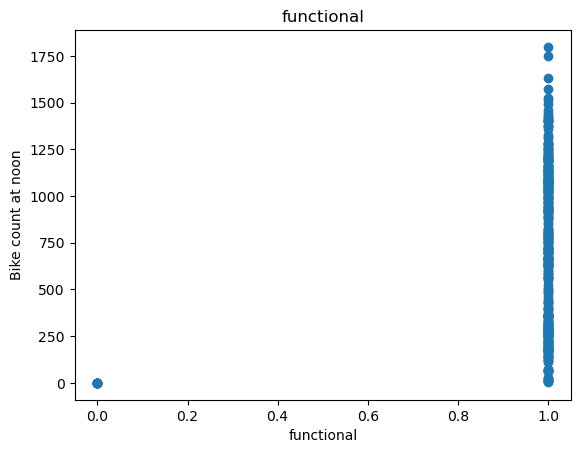

In [37]:
for label in df.columns[1:]:
    plt.scatter(df[label],df['bike_count'])
    plt.title(label)
    plt.ylabel('Bike Count at noon'.capitalize())
    plt.xlabel(label)
    plt.show()

In [77]:
df = df.drop(columns=['wind','visibility','humidity'])

In [78]:
df

bike_count  temp  dew_pt_temp  radiation  rain  snow  functional
12           449   1.7        -17.2       1.11   0.0   0.0           1
36           479   4.3         -7.8       1.09   0.0   0.0           1
60           333   5.8          3.4       0.43   0.0   0.0           1
84           393  -0.3        -12.9       1.11   0.0   0.0           1
108          321  -2.3        -19.7       0.00   0.0   0.0           1
...          ...   ...          ...        ...   ...   ...         ...
8652         752   9.1          1.0       1.69   0.0   0.0           1
8676         672   9.3          2.1       0.85   0.0   0.0           1
8700         635   7.9        -18.0       1.81   0.0   0.0           1
8724         661   5.6        -11.9       0.34   0.0   0.0           1
8748         720   6.6         -7.8       1.70   0.0   0.0           1

[365 rows x 7 columns]

### Train,Valid,Test

In [79]:
train,val,test=np.split(df.sample(frac=1),[int(.6*len(df)),int(.8*len(df))])

In [85]:
def get_xy(dataframe,y_label,x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) ==1:
            x = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            x = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((x,y))
    
    return data,x,y

In [101]:
_,x_train_temp,y_train_temp = get_xy(train,'bike_count',x_labels=['temp'])
_,x_valid_temp,y_valid_temp = get_xy(val,'bike_count',x_labels=['temp'])
_,x_test_temp,y_test_temp = get_xy(test,'bike_count',x_labels=['temp'])

### Simple Liner Regression

In [68]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)


LinearRegression()

In [58]:
print(temp_reg.coef_,temp_reg.intercept_)

[[19.67466244]] [379.69900127]


In [59]:
temp_reg.score(x_test_temp,y_test_temp)

0.40513704164670694

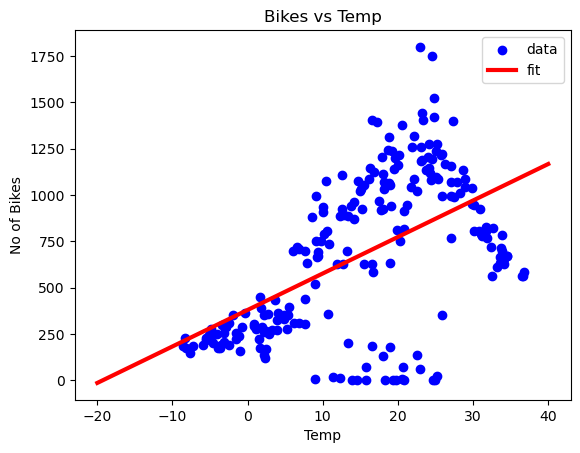

In [62]:
plt.scatter(x_train_temp,y_train_temp,label='data',color='b')
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label = 'fit',color='r',lw=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('No of Bikes')
plt.xlabel('Temp')
plt.show()

### Multiple Linear Regression

In [112]:
_,x_train_all,y_train_all = get_xy(train,'bike_count',x_labels=df.columns[1:])
_,x_valid_all,y_valid_all = get_xy(val,'bike_count',x_labels=df.columns[1:])
_,x_test_all,y_test_all = get_xy(test,'bike_count',x_labels=df.columns[1:])

In [113]:
all_reg = LinearRegression()
all_reg.fit(x_train_all,y_train_all)


LinearRegression()

In [115]:
all_reg.score(x_test_all,y_test_all)

0.46329834363522915

### Regression with Neural Nets

In [116]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [117]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [126]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

In [141]:
history = temp_nn_model.fit(x_train_temp.reshape(-1),
                            y_train_temp,verbose=False,epochs=1000,
                           validation_data=(x_valid_temp,y_valid_temp)
)

In [120]:
def plot_loss(history):
    fig, ax, = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(history.history['loss'], label='loss')
    ax.plot(history.history['val_loss'], label='val_loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('MSE')
    ax.grid(True)
    ax.legend()

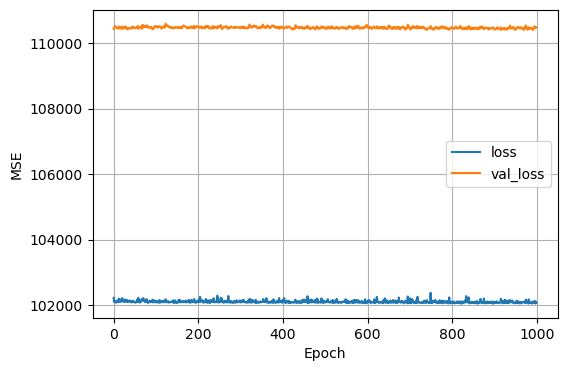

In [142]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


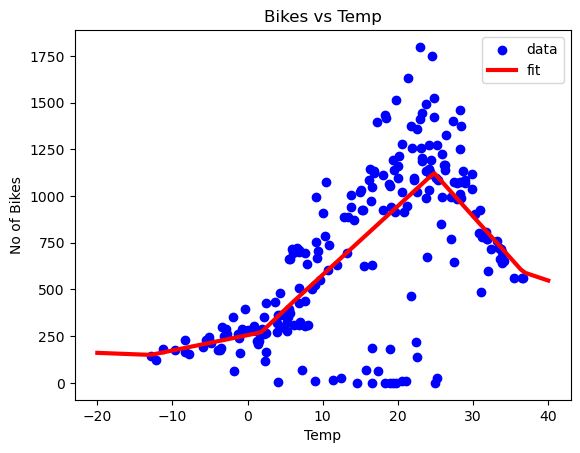

In [143]:
plt.scatter(x_train_temp,y_train_temp,label='data',color='b')
x=tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label = 'fit',color='r',lw=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('No of Bikes')
plt.xlabel('Temp')
plt.show()

### Neural Nets

In [129]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')

In [130]:
history = temp_nn_model.fit(x_train_temp.reshape(-1),
                            y_train_temp,verbose=False,epochs=100,
                           validation_data=(x_valid_temp,y_valid_temp)
)

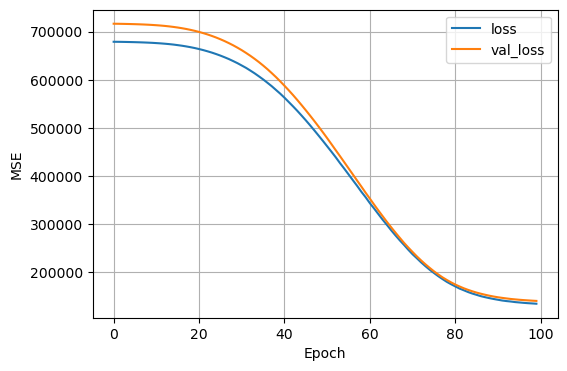

In [131]:
plot_loss(history)